import pandas as pd  #載入pandas

In [2]:
df = pd.read_csv("D:\\Documents\weblog.csv") #匯入csv檔
df.head() #顯示列0~4的資料，()內可輸入數字控制顯示的列數

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [3]:
# 欄'IP'包含的這些關鍵字都存在indexNames
indexNames = df[ (df['IP'] == 'a.out:') | (df['IP'] == 'chmod:') | (df['IP'] == 'rm:') | 
(df['IP'] == 'sh:') | (df['IP'] == 'timeout:') | (df['IP'] == '[Fri') |
(df['IP'] == '[Mon') |(df['IP'] == '[Sat') | (df['IP'] == '[Thu') | (df['IP'] == '[Tue') | (df['IP'] == '[Wed')].index

df.drop(indexNames , inplace=True) #刪除有再indexNames裡的, 列(inplace= True)
df['Staus'] = pd.to_numeric(df['Staus']) #將Staus轉成數值型資料

In [4]:
#提取欄'Time'裡[4]~[11]位置的文字，並放在新增的欄'Months'
df['Months'] = df['Time'].str[4:12]
#如果欄Months的資料符合'Nov/2017'，就在新增的欄'Month'顯示2017.11(為了可以順利轉換為數值型資料)
df.loc[df['Months'] == 'Nov/2017', 'Month'] = '2017.11'  
#如果欄Months的資料符合'Dec/2017'，就在新增的欄'Month'顯示2017.12
df.loc[df['Months'] == 'Dec/2017', 'Month'] = '2017.12' 
#如果欄Months的資料符合'Jan/2018'，就在新增的欄'Month'顯示2018.01
df.loc[df['Months'] == 'Jan/2018', 'Month'] = '2018.01'  
#如果欄Months的資料符合'Feb/2018'，就在新增的欄'Month'顯示2018.02
df.loc[df['Months'] == 'Feb/2018', 'Month'] = '2018.02'
#如果欄Months的資料符合'Mar/2018'，就在新增的欄'Month'顯示2018.03
df.loc[df['Months'] == 'Mar/2018', 'Month'] = '2018.03'  
df.head()

,IP,Time,URL,Staus,Months,Month
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov/2017,2017.11
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov/2017,2017.11
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov/2017,2017.11
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov/2017,2017.11
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov/2017,2017.11


In [5]:
#新增欄'Status OK'，如果符合條件，就顯示'1'，否則為'0'
df['Status OK'] = df['Staus'].apply(lambda x: '1' if x <300 else '0')   
#新增欄'Status Rediraction'，如果符合條件，就顯示'1'，否則為'0'
df['Status Rediraction'] = df['Staus'].apply(lambda x: '1' if x >=300 | x<400 else '0') 
#新增欄'Status Client Error'，如果符合條件，就顯示'1'，否則為'0'
df['Status Client Error'] = df['Staus'].apply(lambda x: '1' if x>=400 else '0')   
df['Status OK'] = pd.to_numeric(df['Status OK'])                       #轉成數值型資料
df['Status Rediraction'] = pd.to_numeric(df['Status Rediraction'])     #轉成數值型資料
df['Status Client Error'] = pd.to_numeric(df['Status Client Error'])   #轉成數值型資料
df.head()

,IP,Time,URL,Staus,Months,Month,Status OK,Status Rediraction,Status Client Error
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov/2017,2017.11,1,0,0
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov/2017,2017.11,0,1,0
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov/2017,2017.11,1,0,0
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov/2017,2017.11,1,0,0
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov/2017,2017.11,1,0,0


In [6]:
df.groupby('Month').sum()

,Staus,Status OK,Status Rediraction,Status Client Error
Month,,,,
2017.11,1634394,5606,963,139
2017.12,438728,1479,310,67
2018.01,1262034,3208,2043,7
2018.02,262140,935,166,34
2018.03,37248,154,16,4


In [7]:
results = df.groupby('Month').sum()

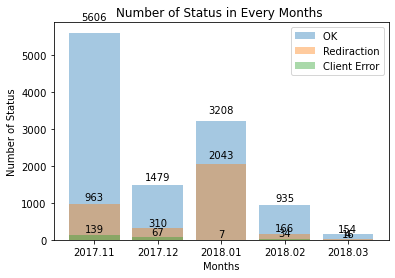

In [9]:
import matplotlib.pyplot as plt #載入資料視覺化套件
Months = ['2017.11','2017.12','2018.01','2018.02','2018.03'] #新增一串列Months，當作x軸使用

#新增一bar，x軸為Months，y軸為results裡的Staus OK，alpha調整顏色,圖例顯示名稱='OK'
OK = plt.bar(Months,results['Status OK'], alpha = 0.4, label = 'OK ') 
#新增第二bar，x軸為Months，y軸為results裡的Staus Rediraction，alpha調整顏色,圖例顯示名稱='Rediraction'
Red = plt.bar(Months,results['Status Rediraction'], alpha = 0.4, label = 'Rediraction')
#新增第三bar，x軸為Months，y軸為results裡的Staus Client Error，alpha調整顏色,圖例顯示名稱='Client Error'
CErr = plt.bar(Months,results['Status Client Error'], alpha = 0.4, label = 'Client Error')

def createLabels(data): #每個bar顯示數值
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.05, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(OK)
createLabels(Red)
createLabels(CErr)

plt.ylabel("Number of Status")#y軸的標籤名字
plt.xlabel("Months")#x軸的標籤名字
plt.title("Number of Status in Every Months ")#title的名字

plt.legend()#顯示圖例
plt.show()

In [12]:
df['HTTP Method'] = df['URL'].str[0:4] #提取URL資料裡0~3的文字，將提取的文字放在HTTP Method

In [13]:
df.loc[df['HTTP Method'] == 'GET ', 'GET'] = '1'  #尋找HTTP Method裡為GET 的資料，新增欄'GET',如果有找到，則在新欄顯示'1'
df.loc[df['GET'].isnull(), 'GET'] = 0      #填補空值為0
df.loc[df['HTTP Method'] == 'POST', 'POST'] = '1'  #尋找HTTP Method裡為POST的資料，新增欄'POST',如果有符合，則在新欄顯示'1'
df.loc[df['POST'].isnull(), 'POST'] = 0      #填補空值為0
df['GET'] = pd.to_numeric(df['GET'])      #將欄'GET轉換為數值型資料
df['POST'] = pd.to_numeric(df['POST'])    #將欄'POST'轉換為數值型資料
df.head()

,IP,Time,URL,Staus,Months,Month,Status OK,Status Rediraction,Status Client Error,HTTP Method,GET,POST
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov/2017,2017.11,1,0,0,GET,1,0
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov/2017,2017.11,0,1,0,POST,0,1
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov/2017,2017.11,1,0,0,GET,1,0
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov/2017,2017.11,1,0,0,GET,1,0
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov/2017,2017.11,1,0,0,GET,1,0


In [14]:
df.groupby('Month').sum() #加總目前的數值型資料

,Staus,Status OK,Status Rediraction,Status Client Error,GET,POST
Month,,,,,,
2017.11,1634394,5606,963,139,6772,482
2017.12,438728,1479,310,67,1821,108
2018.01,1262034,3208,2043,7,5239,12
2018.02,262140,935,166,34,1102,70
2018.03,37248,154,16,4,164,10


In [15]:
dataGP = {'Month':['201711', '201712', '201801', '201802', '201803'],
        'GET':[6772, 1821, 5239, 1102, 164], 'POST':[482, 108, 12, 70, 10]} #資料欄列內容
df_GP = pd.DataFrame(dataGP) #顯示表格
df_GP.head() #顯示表格

,Month,GET,POST
0,201711,6772,482
1,201712,1821,108
2,201801,5239,12
3,201802,1102,70
4,201803,164,10


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

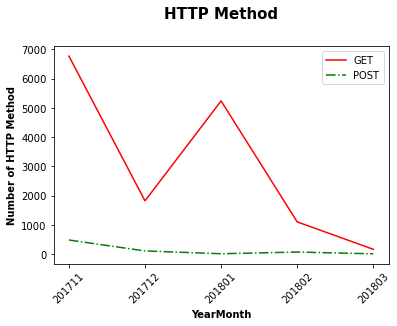

In [16]:
#畫第一條線，plt.plot(x, y, c)分別為x軸資料、y軸資料、線顏色 = 紅色
plt.plot(df_GP['Month'], df_GP['GET'],c = "r")  
#畫第二條線，plt.plot(x, y, c)分別為x軸資料、y軸資料、線顏色 = 綠色及線條為 -.
plt.plot(df_GP['Month'], df_GP['POST'], "g-.")  
plt.legend(labels=["GET", "POST"], loc = 'best')            # 設定圖例，參數為標籤, 位置
plt.xlabel("YearMonth", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("Number of HTTP Method", fontweight = "bold")    # 設定y軸標題及粗體
# 設定標題、文字大小、粗體及位置
plt.title("HTTP Method", fontsize = 15, fontweight = "bold", y = 1.1)   
plt.xticks(rotation=45)   # 將x軸數字旋轉45度